# Data Processing

In [2]:
import pandas, seaborn

df = pandas.read_csv('E:\Classes\MATH 4685\Project\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Checking for null/nan values

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Counting the number of zeros features

In [4]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]

def counting_zero():
    for i in columns:
        count = 0
        count = (df[i] == 0).sum()
        print(i +" : "+ str(count))
        
counting_zero()        

Glucose : 5
BloodPressure : 35
SkinThickness : 227
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


Removing feature SkinThickness as it has a lot of zero values

In [5]:
df = df.drop(columns=['SkinThickness'])
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


Removing zero values for features which should not have zero values

In [6]:
Q = (df['Glucose']>0) & (df['BloodPressure']>0) & (df['BMI']>0) & (df['Age']>0)
new_data = df[Q]
new_data

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


<AxesSubplot:>

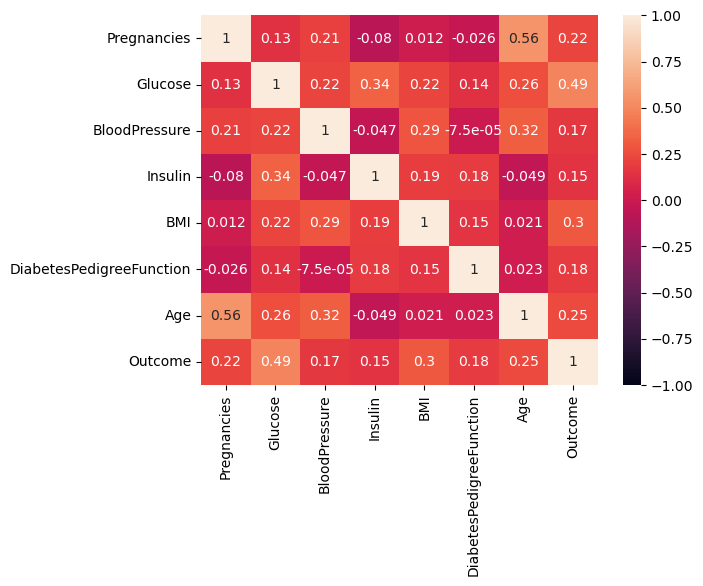

In [7]:
seaborn.heatmap(new_data.corr(), vmin = -1, vmax = 1, annot=True)

# Modeling

In [8]:
x = new_data.drop(columns=['Outcome'])
y = new_data["Outcome"]

#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

In [9]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((579, 7), (145, 7), (579,), (145,))

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate


def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score)}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ", result['test_tp'])
    print("TN: ", result['test_tn'])
    print("FN: ", result['test_fn'])
    print("FP: ", result['test_fp'])

In [11]:
#Naive Bayes Theorem
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve

nb = GaussianNB()
nb.fit(train_x, train_y)
y_pred = nb.predict(test_x)

#find accuracy
acc = []
ac = accuracy_score(test_y, y_pred)
acc.append(ac)
print("\nAccuracy =", ac)

#cross val score
result = cross_validate(nb, train_x, train_y, scoring = scoring, cv = 10)
display_result(result)

print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(test_y, y_pred)))

#display predicted values uncomment below line
pandas.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy = 0.7862068965517242
TP:  [12 11 16 11 12 14 14 15 12  8]
TN:  [33 31 28 28 34 34 31 31 33 31]
FN:  [ 9 10  4  9  8  6  6  5  8 12]
FP:  [ 4  6 10 10  4  4  7  7  5  6]
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.70      0.60      0.64        47

    accuracy                           0.79       145
   macro avg       0.76      0.74      0.75       145
weighted avg       0.78      0.79      0.78       145



,Actual,Predicted
611,1,1
585,0,0
594,0,1
496,0,0
491,0,0


C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


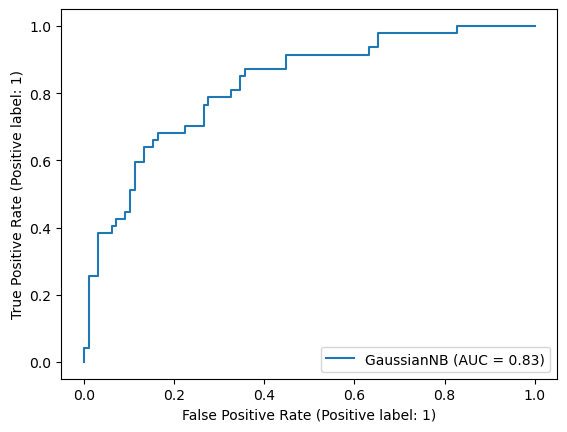

In [12]:
# Displaying ROC-AUC curve

plot_roc_curve(nb, test_x, test_y)

In [13]:
#Decision Tree Classification Algorithm 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
y_pred = dt.predict(test_x)

#find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)
print("\nAccuracy =",ac)

#cross val score
result = cross_validate(dt, train_x, train_y, scoring = scoring, cv = 10)
display_result(result)

print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(test_y, y_pred)))

#display predicted values uncomment below line
pandas.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy = 0.6482758620689655
TP:  [ 8 12 14 12 11 13 12  9 10  6]
TN:  [27 27 27 32 31 29 28 32 26 30]
FN:  [13  9  6  8  9  7  8 11 10 14]
FP:  [10 10 11  6  7  9 10  6 12  7]
Classification Report

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        98
           1       0.46      0.45      0.45        47

    accuracy                           0.65       145
   macro avg       0.60      0.60      0.60       145
weighted avg       0.65      0.65      0.65       145



,Actual,Predicted
611,1,1
585,0,0
594,0,1
496,0,0
491,0,1


C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


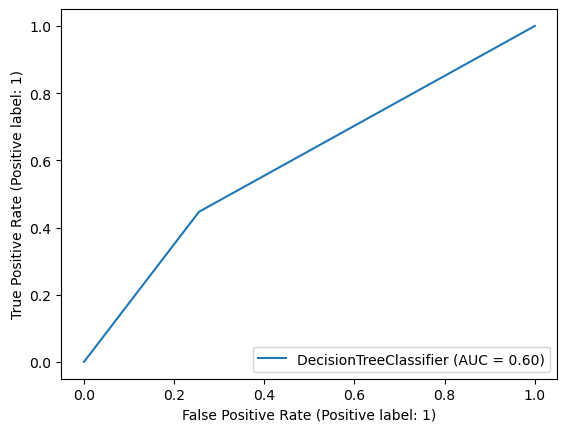

In [14]:
# Displaying ROC-AUC curve

plot_roc_curve(dt, test_x, test_y)

In [15]:
#Logistic Regression Classification Algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000)
lr.fit(train_x, train_y)
y_pred = lr.predict(test_x)
#find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)
print("\nAccuracy =",ac)

#cross val score
result = cross_validate(lr, train_x, train_y, scoring = scoring, cv = 10)
display_result(result)

print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(test_y, y_pred)))

#display predicted values uncomment below line
pandas.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy = 0.8206896551724138
TP:  [11 12 10 12 11 12 11 15 11 10]
TN:  [36 31 29 33 35 34 33 34 33 32]
FN:  [10  9 10  8  9  8  9  5  9 10]
FP:  [1 6 9 5 3 4 5 4 5 5]
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        98
           1       0.84      0.55      0.67        47

    accuracy                           0.82       145
   macro avg       0.83      0.75      0.77       145
weighted avg       0.82      0.82      0.81       145



,Actual,Predicted
611,1,1
585,0,0
594,0,0
496,0,0
491,0,0


C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


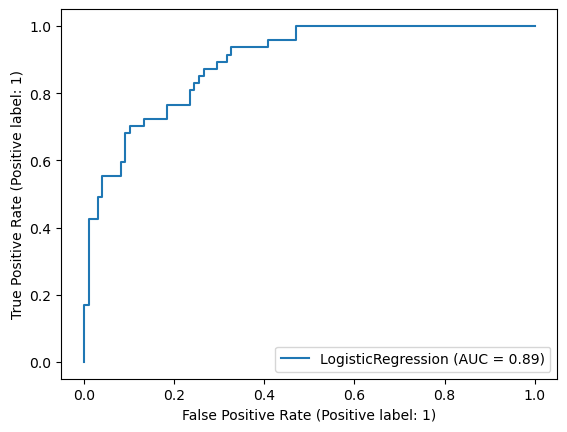

In [16]:
# Displaying ROC-AUC curve

plot_roc_curve(lr, test_x, test_y)

In [17]:
# Linear Discriminant Analysis (LDA) Classification Algorithm 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

lda = LinearDiscriminantAnalysis()
lda.fit(train_x, train_y)
y_pred = lda.predict(test_x)
#find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)
print("\nAccuracy =",ac)

#cross val score
result = cross_validate(lda, train_x, train_y, scoring = scoring, cv = 10)
display_result(result)

print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(test_y, y_pred)))

#display predicted values uncomment below line
pandas.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy = 0.8206896551724138
TP:  [11 12 10 12 11 12 10 15 11 10]
TN:  [36 31 29 33 35 34 33 34 33 31]
FN:  [10  9 10  8  9  8 10  5  9 10]
FP:  [1 6 9 5 3 4 5 4 5 6]
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        98
           1       0.84      0.55      0.67        47

    accuracy                           0.82       145
   macro avg       0.83      0.75      0.77       145
weighted avg       0.82      0.82      0.81       145



,Actual,Predicted
611,1,1
585,0,0
594,0,0
496,0,0
491,0,0


C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


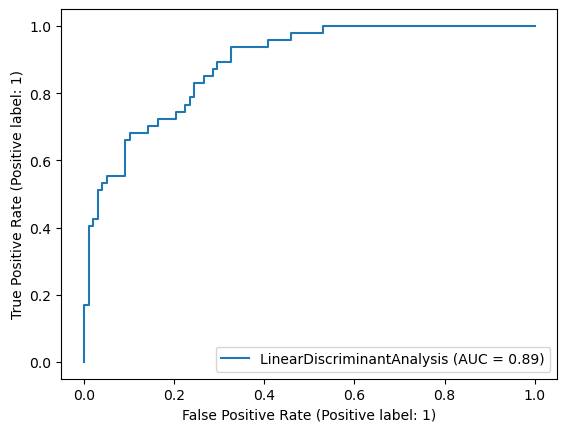

In [18]:
# Displaying ROC-AUC curve

plot_roc_curve(lda, test_x, test_y)

In [19]:
# Quadratic Discriminant Analysis Classification Algorithm 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

qda = QuadraticDiscriminantAnalysis()
qda.fit(train_x, train_y)
y_pred = qda.predict(test_x)
ac = accuracy_score(test_y, y_pred)
acc.append(ac)
print("\nAccuracy =",ac)

#cross val score
result = cross_validate(qda, train_x, train_y, scoring = scoring, cv = 10)
display_result(result)

print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(test_y, y_pred)))

#display predicted values uncomment below line
pandas.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy = 0.8
TP:  [11 11 13 13 11 11 10 13 12 10]
TN:  [32 30 28 28 35 31 31 31 33 29]
FN:  [10 10  7  7  9  9 10  7  8 10]
FP:  [ 5  7 10 10  3  7  7  7  5  8]
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        98
           1       0.74      0.60      0.66        47

    accuracy                           0.80       145
   macro avg       0.78      0.75      0.76       145
weighted avg       0.79      0.80      0.79       145



,Actual,Predicted
611,1,1
585,0,0
594,0,0
496,0,0
491,0,0


C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


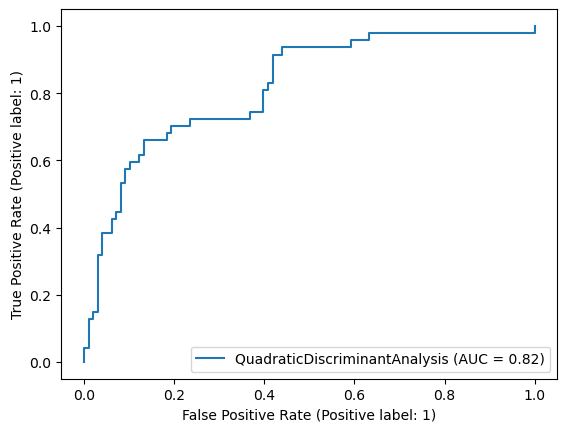

In [20]:
# Displaying ROC-AUC curve

plot_roc_curve(qda, test_x, test_y)

C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alias\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

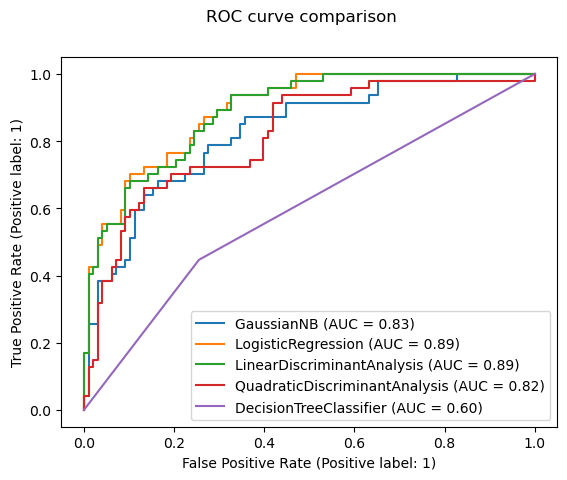

In [22]:
import matplotlib.pyplot as plt

nb_disp = plot_roc_curve(nb, test_x, test_y)
lr_disp = plot_roc_curve(lr, test_x, test_y, ax=nb_disp.ax_)
lda_disp = plot_roc_curve(lda, test_x, test_y, ax=lr_disp.ax_)
qda_disp = plot_roc_curve(qda, test_x, test_y, ax=lda_disp.ax_)
dt_disp = plot_roc_curve(dt, test_x, test_y, ax=qda_disp.ax_)
dt_disp.figure_.suptitle("ROC curve comparison")
plt.show()

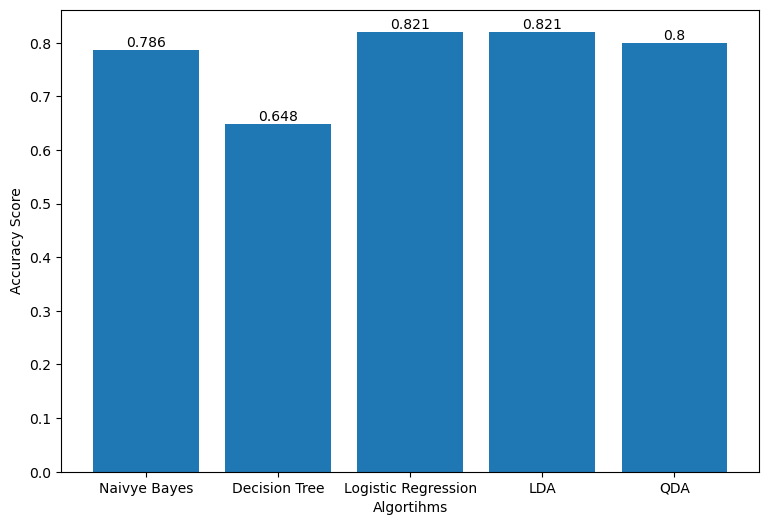

In [23]:
# Visualizing accuracy score of our model.

import matplotlib.pyplot as plt
ax=plt.figure(figsize=(9,6))
plt.bar(['Naivye Bayes','Decision Tree', 'Logistic Regression', 'LDA', 'QDA'], acc, label = 'Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

for i in range(len(acc)):
    plt.text(i, acc[i], acc[i].round(3), ha = 'center', va = 'bottom')
    
plt.show()